In [63]:
# Dependencies

import pandas as pd
import datetime as dt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier


import data_outcomes
import matplotlib.pyplot as plt

In [2]:
df_diabetes = data_outcomes.getDiabetesDataframe()
display(df_diabetes)

----> Retrieving information for Resources/diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Add the y variables as the "Target" column.
df_diabetes["Target"] = df_diabetes['Outcome']

# Display the data
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Target
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,1


<Axes: xlabel='BMI', ylabel='Age'>

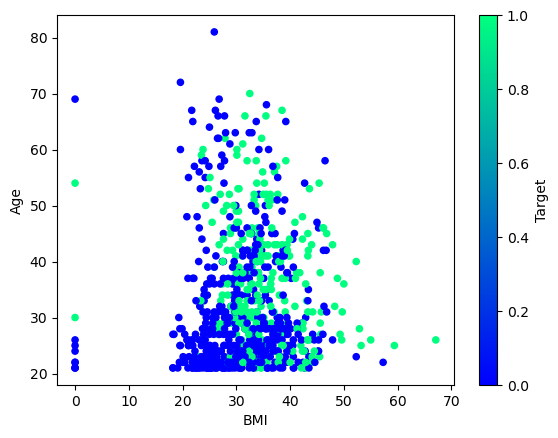

In [6]:
df_diabetes.plot.scatter(x="BMI",
                        y="Age",
                        c="Target",
                        colormap="winter")

In [8]:
model = KMeans(n_clusters=2, n_init='auto', random_state=1)

# Print the model
model

KMeans(n_clusters=2, random_state=1)

In [9]:
# Fit the data to the instance of the model
model.fit(df_diabetes)

KMeans(n_clusters=2, random_state=1)

In [10]:
# Make predictions about the data clusters using the trained model
diabetes_rating_BMI_age = model.predict(df_diabetes)

# Print the predictions
print(diabetes_rating_BMI_age)

[1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 

In [12]:
# Create a copy of the DataFrame
diabetes_age_BMI_df = df_diabetes.copy()

# Add a column to the DataFrame that contains the customer_ratings information
diabetes_age_BMI_df['diabetes rating'] = diabetes_rating_BMI_age

# Review the DataFrame
diabetes_age_BMI_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Target,diabetes rating
0,6,148,72,35,0,33.6,0.627,50,1,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1,0


<Axes: xlabel='BMI', ylabel='Age'>

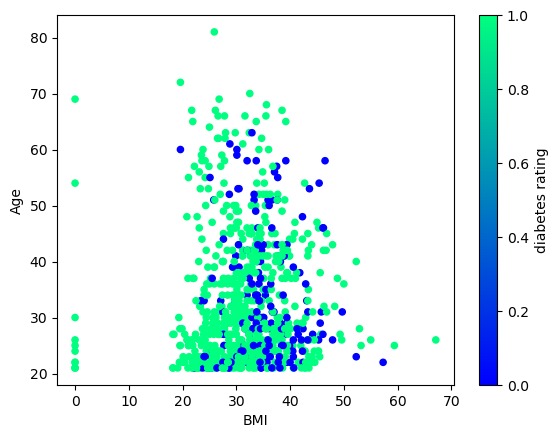

In [13]:
diabetes_age_BMI_df.plot.scatter(
    x="BMI", 
    y="Age",
    c="diabetes rating", 
    colormap='winter')

In [14]:
# Create a list to store inertia values
inertia = []

# Create a list to store the values of k
k = list(range(1, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=2)
    k_model.fit(diabetes_age_BMI_df)
    inertia.append(k_model.inertia_)

In [15]:
# Create a Dictionary that holds the list values for k and inertia
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,1.161629e+07
1,2,5.142713e+06
2,3,2.933308e+06
3,4,2.151674e+06
4,5,1.848217e+06


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

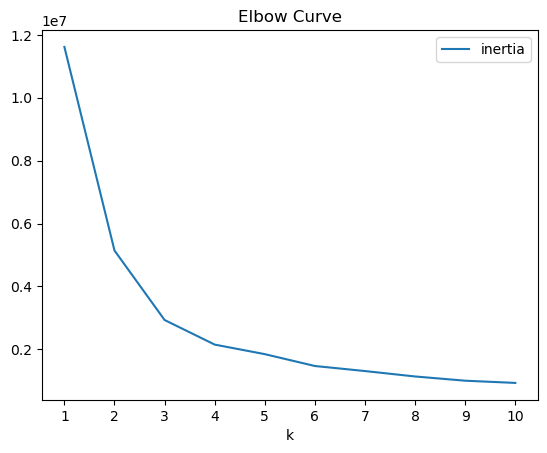

In [16]:
# Plot the Elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

In [19]:
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
model = KMeans(n_clusters=3, n_init='auto', random_state=1)

# Fit the model
model.fit(diabetes_age_BMI_df)

# Make predictions
diabetes_segment_3 = model.predict(diabetes_age_BMI_df)

# Create a copy of the DataFrame and name it as used_car_sales_predictions_df
diabetes_predictions_df = diabetes_age_BMI_df.copy()

# Add a class column with the labels to the used_car_sales_predictions_df DataFrame
diabetes_predictions_df['diabetes_segment_3'] = diabetes_segment_3

In [20]:
# Display the updated DataFrame.
diabetes_predictions_df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Target,diabetes rating,diabetes_segment_3
0,6,148,72,35,0,33.6,0.627,50,1,1,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0,1,1
2,8,183,64,0,0,23.3,0.672,32,1,1,1,1


<Axes: xlabel='BMI', ylabel='Age'>

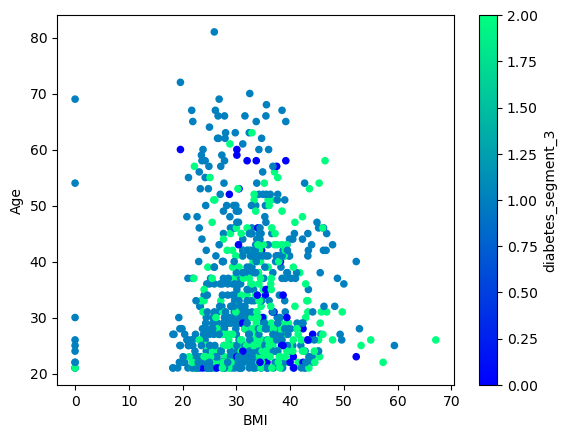

In [21]:
# Plot the clusters with "selling_price" vs. "km_driven".
diabetes_predictions_df.plot.scatter(
    x="BMI",
    y="Age",
    c="diabetes_segment_3",
    colormap="winter")

In [22]:
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

# Fit the model
model.fit(diabetes_age_BMI_df)

# Make predictions
diabetes_segment_4 = model.predict(diabetes_age_BMI_df)

# Create a copy of the DataFrame and name it as used_car_sales_predictions_df
diabetes_predictions_df = diabetes_age_BMI_df.copy()

# Add a class column with the labels to the used_car_sales_predictions_df DataFrame
diabetes_predictions_df['diabetes_segment_4'] = diabetes_segment_4

In [23]:
# Display the updated DataFrame.
diabetes_predictions_df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Target,diabetes rating,diabetes_segment_4
0,6,148,72,35,0,33.6,0.627,50,1,1,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0,1,1
2,8,183,64,0,0,23.3,0.672,32,1,1,1,1


<Axes: xlabel='BMI', ylabel='Age'>

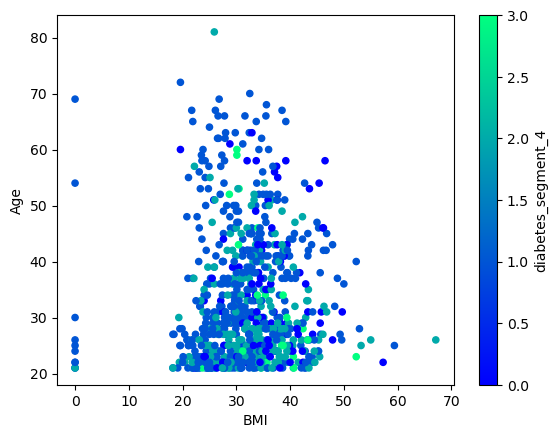

In [24]:
# Plot the clusters with "selling_price" vs. "km_driven".
diabetes_predictions_df.plot.scatter(
    x="BMI",
    y="Age",
    c="diabetes_segment_4",
    colormap="winter")

In [26]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Target'],
      dtype='object')

<Axes: xlabel='BMI', ylabel='Age'>

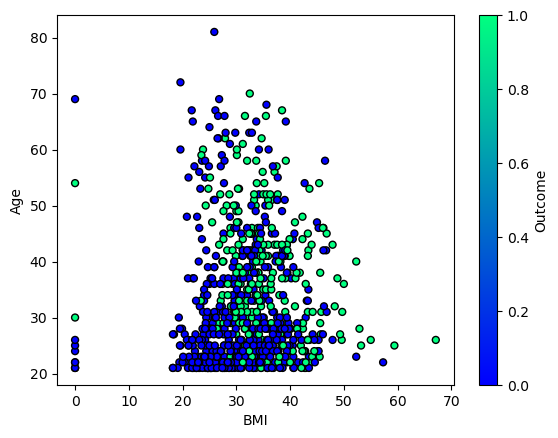

In [27]:
# Plot the data on a scatter plot
df_diabetes.plot.scatter(
    x='BMI', 
    y='Age', 
    c='Outcome', 
    marker='o', 
    s=25, 
    edgecolor='k',
    colormap="winter"
)

In [29]:
# Check the number of unhealthy vs. healthy firms ('Firm Category')
# using value_counts
df_diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [31]:

# Split training and testing sets
# Create the features DataFrame, X
X = df_diabetes.copy()
X = X.drop(columns='Outcome')

# Create the target DataFrame, y
y = df_diabetes['Outcome']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
# Review the X_train DataFrame
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Target
650,1,91,54,25,100,25.2,0.234,23,0
218,5,85,74,22,0,29.0,1.224,32,1
197,3,107,62,13,48,22.9,0.678,23,1
437,5,147,75,0,0,29.9,0.434,28,0
678,3,121,52,0,0,36.0,0.127,25,1
...,...,...,...,...,...,...,...,...,...
382,1,109,60,8,182,25.4,0.947,21,0
390,1,100,66,29,196,32.0,0.444,42,0
547,4,131,68,21,166,33.1,0.160,28,0
88,15,136,70,32,110,37.1,0.153,43,1


In [35]:
# Create a `LogisticRegression` function and assign it 
# to a variable named `logistic_regression_model`.
logistic_regression_model = LogisticRegression()


In [36]:
# Fit the model
logistic_regression_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
# Score the model
print(f"Training Data Score: {logistic_regression_model.score(X_train, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [38]:
# Generate predictions from the model we just fit
predictions = logistic_regression_model.predict(X_train)

# Convert those predictions (and actual values) to a DataFrame
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_train})
results_df

,Prediction,Actual
650,0,0
218,1,1
197,1,1
437,0,0
678,1,1
...,...,...
382,0,0
390,0,0
547,0,0
88,1,1


In [39]:
# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Actual Targets": y_test})

In [40]:
# Display the results DataFrame
results_df

,Testing Data Predictions,Testing Data Actual Targets
618,1,1
292,1,1
447,0,0
121,0,0
514,0,0
...,...,...
238,1,1
342,0,0
543,0,0
332,1,1


In [42]:
# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, testing_predictions)

1.0

Hi

In [44]:
# Define features set
# Drop the target to create the X data
X = df_diabetes.copy()
X.drop("Target", axis=1, inplace=True)
X.drop("Outcome", axis=1, inplace=True)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [45]:
y = df_diabetes["Outcome"].values.reshape(-1, 1)
y[:5]

array([[1],
       [0],
       [1],
       [0],
       [1]])

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [47]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-1.14189354,  0.48468922, -1.57922855, ...,  1.4326994 ,
         5.58077513, -0.02474152],
       [ 1.23580436,  1.87223734, -0.10023209, ..., -0.23374251,
         0.48364278,  2.27933102],
       [ 1.23580436,  2.28219474,  0.53362354, ..., -0.74649387,
         0.28865385,  2.87668316],
       ...,
       [-0.25025683,  1.84070216, -0.3115173 , ...,  0.26619006,
        -0.56442269, -0.62209366],
       [-0.84468131,  0.70543551,  0.63926614, ...,  1.20196128,
         0.45926916, -0.45142162],
       [-0.54746907, -0.9028589 , -0.3115173 , ...,  0.77894142,
         0.66339819, -0.87810172]])

In [48]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.64137988, -0.96592927, -3.69208063, ..., -0.27219886,
         0.13631875, -0.19541356],
       [ 0.34416764, -2.44808295, -0.4171599 , ..., -0.88750049,
         0.39833512,  0.23126654],
       [-0.54746907, -0.87132372, -0.10023209, ..., -0.75931265,
         0.31912087, -1.04877376],
       ...,
       [-1.14189354,  1.61995586,  0.42798093, ...,  1.86853805,
         2.14104863,  2.10865898],
       [-0.54746907, -0.01987374,  0.00541052, ...,  0.91994804,
         1.309299  , -0.87810172],
       [-0.25025683,  0.26394293, -0.3115173 , ..., -1.13105739,
        -0.43341451, -0.96343774]])

In [49]:
# Check the max and min of the scaled training and testing sets
print("Scaled data min/max (StandardScaler):")
print("Training data min:",X_train_scaled.min())
print("Training data max:",X_train_scaled.max())
print("Testing data min:",X_test_scaled.min())
print("Testing data max:",X_test_scaled.max())

Scaled data min/max (StandardScaler):
Training data min: -4.092196469418144
Training data max: 6.418248212962566
Testing data min: -4.092196469418144
Testing data max: 5.008026376717516


In [52]:
# Alternatively, scaling the data by using MinMaxScaler()
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[0.        , 0.69191919, 0.32786885, ..., 0.64232489, 0.94363792,
        0.2       ],
       [0.47058824, 0.91414141, 0.55737705, ..., 0.4485842 , 0.2292912 ,
        0.65      ],
       [0.47058824, 0.97979798, 0.6557377 , ..., 0.38897168, 0.20196413,
        0.76666667],
       ...,
       [0.17647059, 0.90909091, 0.52459016, ..., 0.50670641, 0.0824082 ,
        0.08333333],
       [0.05882353, 0.72727273, 0.67213115, ..., 0.61549925, 0.22587532,
        0.11666667],
       [0.11764706, 0.46969697, 0.52459016, ..., 0.56631893, 0.25448335,
        0.03333333]])

In [53]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.35294118, 0.45959596, 0.        , ..., 0.44411326, 0.18061486,
        0.16666667],
       [0.29411765, 0.22222222, 0.50819672, ..., 0.37257824, 0.21733561,
        0.25      ],
       [0.11764706, 0.47474747, 0.55737705, ..., 0.38748137, 0.20623399,
        0.        ],
       ...,
       [0.        , 0.87373737, 0.63934426, ..., 0.69299553, 0.46157131,
        0.61666667],
       [0.11764706, 0.61111111, 0.57377049, ..., 0.58271237, 0.34500427,
        0.03333333],
       [0.17647059, 0.65656566, 0.52459016, ..., 0.3442623 , 0.10076857,
        0.01666667]])

In [54]:
# Check the max and min of the scaled training and testing sets
print("Scaled data min/max (MinMaxScaler):")
print("Training data min:",X_train_scaled.min())
print("Training data max:",X_train_scaled.max())
print("Testing data min:",X_test_scaled.min())
print("Testing data max:",X_test_scaled.max())

Scaled data min/max (MinMaxScaler):
Training data min: 0.0
Training data max: 1.0
Testing data min: 0.0
Testing data max: 1.5714285714285714


To support a vector machine

In [57]:
# Get the target variable (the "Occupancy" column)
y = df_diabetes["Outcome"]
# Get the features (everything except the "Occupancy" column)
X = df_diabetes.copy()
X = X.drop(columns="Outcome")
X = X.drop(columns="Target")
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [60]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create the support vector machine classifier model with a 'linear' kernel
model = SVC(kernel='linear')

# Fit the model to the training data
model.fit(X_train, y_train)

# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % model.score(X_train, y_train))
print('Test Accuracy: %.3f' % model.score(X_test, y_test))

Train Accuracy: 0.781
Test Accuracy: 0.729


In [61]:
# Make and save testing predictions with the saved SVM model using the testing data
testing_predictions = model.predict(X_test)

# Review the predictions
testing_predictions

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [62]:
# Display the accuracy score for the testing dataset
accuracy_score(y_test, testing_predictions)

0.7291666666666666

K_Nearest Neighbors

In [69]:
y = df_diabetes['Outcome'].values

X = df_diabetes.copy()
X.drop(columns='Outcome', inplace=True)
X.drop(columns='Target', inplace=True)

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [71]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [72]:
# Transform the training and testing data by using the X_scaler model
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.698
k: 3, Train/Test Score: 0.837/0.734
k: 5, Train/Test Score: 0.819/0.792
k: 7, Train/Test Score: 0.800/0.786
k: 9, Train/Test Score: 0.786/0.786
k: 11, Train/Test Score: 0.774/0.760
k: 13, Train/Test Score: 0.776/0.792
k: 15, Train/Test Score: 0.771/0.786
k: 17, Train/Test Score: 0.781/0.781
k: 19, Train/Test Score: 0.783/0.776


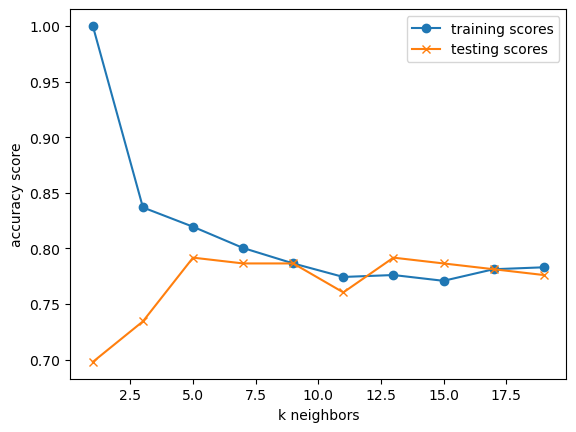

In [73]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [74]:
# Train the KNN model with the best k value
# Note that k: 9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.786
